In [196]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('part_10.csv')
df.shape

(57845, 8)

In [5]:
df.sample(8)

CLIENT_IP                                   CLIENT_USERAGENT  \
6469    207.46.13.128  Mozilla/5.0 (compatible; bingbot/2.0; +http://...   
35240    51.255.65.97  Mozilla/5.0 (compatible; AhrefsBot/5.1; +http:...   
30949  217.175.140.69                     Google Update/1.3.29.5;winhttp   
52281  37.157.108.192  Mozilla/5.0 (Linux; Android 7.0; SM-G930F Buil...   
48750   82.202.246.52  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...   
22981    151.80.61.12  Mozilla/5.0 (X11; U; Linux i686; en-GB; rv:1.9...   
43863  217.175.140.69         MICROSOFT_DEVICE_METADATA_RETRIEVAL_CLIENT   
14678   188.168.48.57  Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
6469           318           200         REQUEST_ARGS   
35240          229           200         REQUEST_ARGS   
30949         6627           200          REQUEST_XML   
52281          943           200     REQUEST_GET_ARGS   
48750         1200           500     REQUEST_GET_ARGS   
22981          351           200     REQUEST_GET_ARGS   
43863         1798           302          REQUEST_XML   
14678         1723           404      REQUEST_COOKIES   

                                   MATCHED_VARIABLE_NAME  \
6469                                              action   
35240                                              board   
30949                     REQUEST_XML./request:requestid   
52281                                REQUEST_GET_ARGS.TS   
48750                          REQUEST_GET_ARGS.ticketId   
22981                                    forgot_password   
43863  REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...   
14678                            REQUEST_COOKIES.User-cn   

                        MATCHED_VARIABLE_VALUE              EVENT_ID  
6469               emailuser;sa=email;msg=6086  AVdqzFiCq1Ppo9zF-NPs  
35240  korea;action=sendtopic;topic=1355301333  AVdZayUqq1Ppo9zF074e  
30949   {915FA7E4-C2BE-49EF-BE4A-B93231FC09AA}  RaYtI2QB5cBXmMW1gQ9o  
52281                      20180206T220214,41Z  K8K7_mMBjksgoq1eBdLA  
48750                                313318479  x1GSG2QB5cBXmMW1VHGt  
22981  yes\' AND 7041=7041 AND \'Jniq\'=\'Jniq  sNHBFWQBoRd31uenKlr3  
43863              DOID:USB\\VID_0A89&PID_0009  SXl3H2QB5cBXmMW1R0sp  
14678                          Татьяна Шаброва  1ahbI2QB5cBXmMW1v12C

In [6]:
cols_describe = [df[df.columns[i]].describe() for i in range(len(df.columns))]
print(*cols_describe, sep='\n'*3)

count              57838
unique             24940
top       217.175.140.69
freq               11286
Name: CLIENT_IP, dtype: object


count                                                 57517
unique                                                 6992
top       Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
freq                                                   2117
Name: CLIENT_USERAGENT, dtype: object


count     57794
unique     5758
top         259
freq        261
Name: REQUEST_SIZE, dtype: object


count     57770
unique       60
top         200
freq      25771
Name: RESPONSE_CODE, dtype: object


count                57730
unique                  21
top       REQUEST_GET_ARGS
freq                 20812
Name: MATCHED_VARIABLE_SRC, dtype: object


count                  53167
unique                  3209
top       REQUEST_GET_ARGS._
freq                   11165
Name: MATCHED_VARIABLE_NAME, dtype: object


count                                                 57683
unique       

In [205]:
#df.loc[df.CLIENT_IP=='217.175.140.69']

In [206]:
# самый часто встречающийся event_id:
#df.loc[df.EVENT_ID=='cr1nJWQB5cBXmMW1hh_4']

In [9]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID'],
      dtype='object')

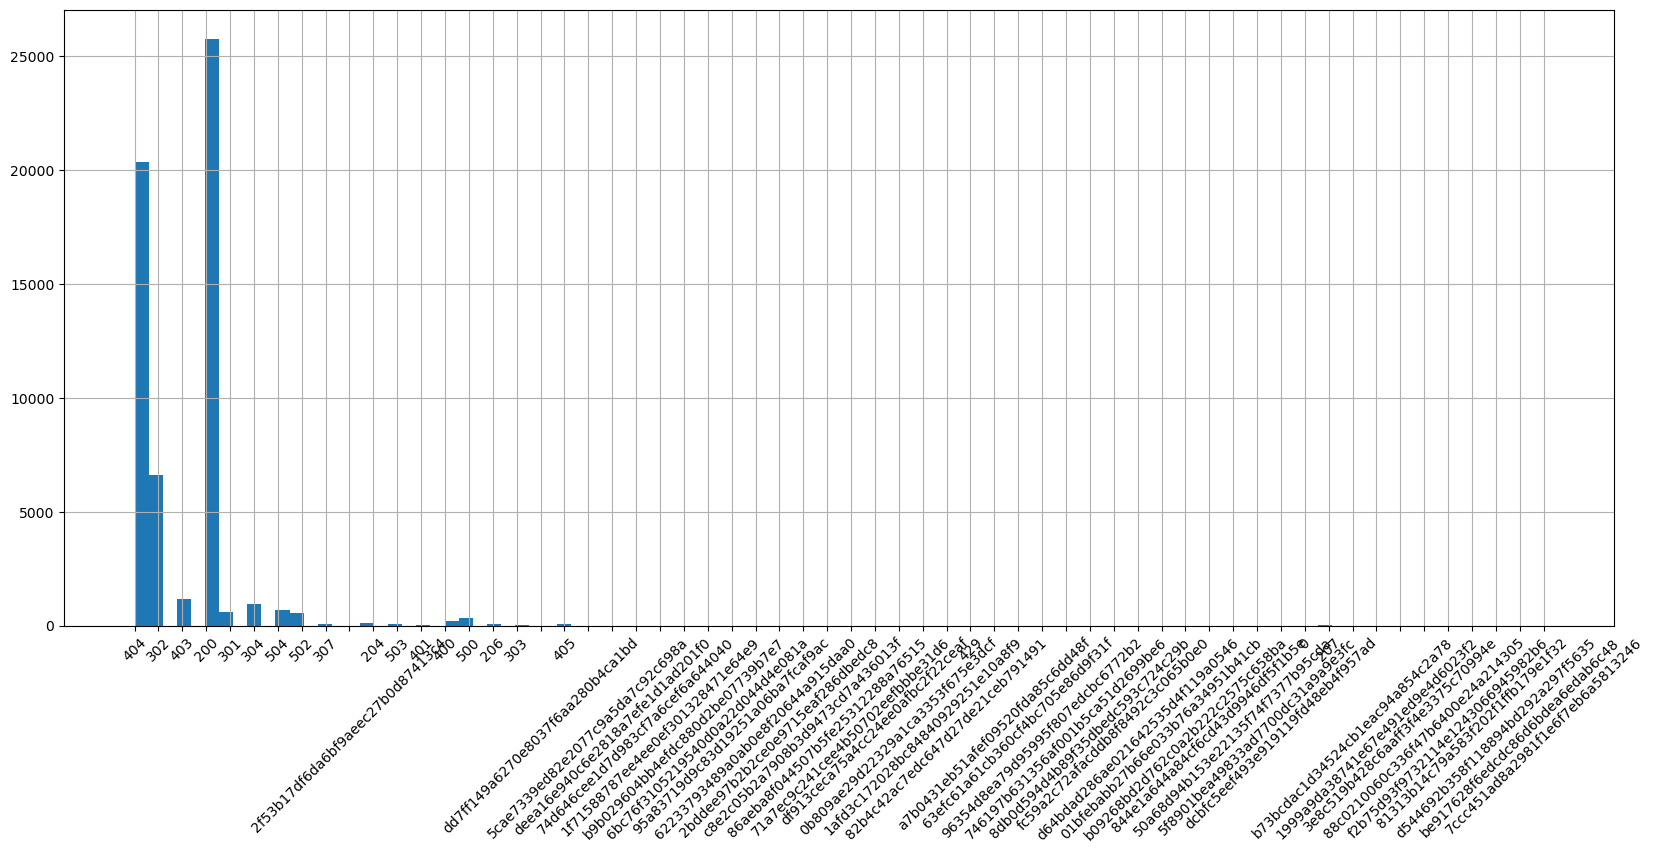

In [10]:
df.RESPONSE_CODE.hist(figsize=(20,8), bins=100);
plt.xticks(rotation=45)
plt.show();

In [11]:
df.RESPONSE_CODE.value_counts()

200                                 25771
404                                 20367
302                                  6630
403                                  1156
304                                   940
504                                   700
301                                   584
502                                   558
500                                   318
400                                   212
204                                   116
206                                    90
307                                    74
405                                    63
503                                    62
401                                    46
303                                    37
207                                     4
8db0d594d4b89f35dbedc593c724c29b        1
dcbfc5eef493e919119fd48eb4f957ad        1
fc59a2c72afacddb8f8492c3c065b0e0        1
d64bdad286ae021642535d4f119a0546        1
01bfebabb27b66e033b76a34951b41cb        1
b09268bd2d762c0a2b222c2575c658ba  

In [12]:
# куча левых респонз кодов,появившихся по 1 разу и похожих на искусственные, думаю, их можно удалить 

In [13]:
response_codes_ok = [226,431,451,510,511, list(range(100,104)), list(range(200,209)), list(range(300,309)), list(range(400,419)), list(range(421,430)), list(range(500,509))]

In [14]:
def flat_list(lst):
    res = []
    for sub in lst:
        if isinstance(sub, list):
            res.extend(flat_list(sub))
        else:
            res.append(str(sub))
    return res

In [15]:
# слишком много уникальных + айдишники чаще всего бесполезныб попробуем удалить
cols2drop = ['MATCHED_VARIABLE_VALUE','EVENT_ID']
response_codes_ok = flat_list(response_codes_ok)



In [234]:
df_clean = df.drop(cols2drop, axis=1)
df_clean = df_clean.loc[df_clean.RESPONSE_CODE.isin(response_codes_ok).index]
df_clean.sample(3)

CLIENT_IP                                   CLIENT_USERAGENT  \
28136  217.175.140.69  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   
22870   213.87.147.26  Mozilla/5.0 (Linux; Android 4.0.4; HTC Incredi...   
44733    5.143.231.38  Mozilla/5.0 (compatible; SputnikBot/2.3; +http...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
28136          549           304      REQUEST_HEADERS   
22870         1455           404      REQUEST_COOKIES   
44733          820           200         REQUEST_PATH   

               MATCHED_VARIABLE_NAME  
28136  REQUEST_HEADERS.If-None-Match  
22870     REQUEST_COOKIES.LtpaToken2  
44733                   REQUEST_PATH

In [235]:
# проверка признака CLIENT_IP на валидность
import ipaddress
def check_ip_valid(x):
    try:
        ip_obj = ipaddress.ip_address(x)
        if isinstance(ip_obj, ipaddress.IPv4Address) or isinstance(ip_obj, ipaddress.IPv6Address):
            return 1
        else:
            return 0
    except ValueError:
        return 0
df_clean['CLIENT_IP_VALID'] = df_clean['CLIENT_IP'].apply(lambda ip: check_ip_valid(ip))
df_clean.sample(3)

CLIENT_IP                                   CLIENT_USERAGENT  \
29081    95.85.93.186  Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....   
23279  217.175.140.69  Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...   
43274   188.43.52.163  curl/7.22.0 (i686-pc-linux-gnu) libcurl/7.22.0...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
29081          717           200     REQUEST_GET_ARGS   
23279          565           304      REQUEST_HEADERS   
43274        91865           200    REQUEST_POST_ARGS   

                                   MATCHED_VARIABLE_NAME  CLIENT_IP_VALID  
29081                             REQUEST_GET_ARGS.par_1                1  
23279                      REQUEST_HEADERS.If-None-Match                1  
43274  »i?~þOò9¤öþ¬s¶ÓXP¹'#î­äY#ùFÜvô¯!ӭ¦`Ç?...                1

In [238]:
df_clean.loc[df_clean.CLIENT_IP_VALID==0].shape

(147, 7)

In [240]:
# тут полно всякой подозрительной фигни. Можно в отдельный датафрейм соранить, потом смержить с чистым.
df_spooky = df_clean.loc[df_clean.CLIENT_IP_VALID==0]
df_clean.loc[df_clean.CLIENT_IP_VALID==0].to_csv('Bad_IP.csv', index=False)
df_clean.loc[df_clean.CLIENT_IP_VALID==0]

CLIENT_IP  \
50     > -gOxT"O<Ghèe]Ø
È8 G`Qf¾ñ
}y
ðù!T...   
162                                Remote Code Execution   
590                     2a01:598:9902:df0c:8115:691e:c38   
1308                                             ~@.*")ۅ   
1894                               Remote Code Execution   
...                                                  ...   
55871                                                ÕBÿ   
55896                              Remote Code Execution   
56858                   2a00:1148:b0ba:2615:8b4:f98f:f56   
57452                                                NaN   
57705                   2a00:1148:b0ba:2615:8b4:f98f:f56   

                                        CLIENT_USERAGENT  \
50                                         SQL Injection   
162                                 AVdtgf8uq1Ppo9zF_hyd   
590    Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...   
1308                                       SQL Injection   
1894                                AVddr1QQq1Ppo9zF3Vuj   
...                                                  ...   
55871                               AVddkIdNq1Ppo9zF3QzL   
55896                               AVdcvSoAq1Ppo9zF2y_z   
56858  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...   
57452                                                NaN   
57705  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...   

                           REQUEST_SIZE                     RESPONSE_CODE  \
50                 AVdYz8-Wq1Ppo9zF0mzK  2f53b17df6da6bf9aeec27b0d87413c4   
162    4df2f46285c84ba39fa84fc4878214ae                               NaN   
590                                1272                               304   
1308               AVdsla-3q1Ppo9zF_J7c  dd7ff149a6270e8037f6aa280b4ca1bd   
1894   0b168993dda4ce786f3455d01e162a58                               NaN   
...                                 ...                               ...   
55871                               NaN                               NaN   
55896  1cc6e2fe3fcc728c132e90c43d6b787d                               NaN   
56858                               812                               200   
57452                               NaN                               NaN   
57705                               824                               200   

      MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  CLIENT_IP_VALID  
50                     NaN                   NaN                0  
162                    NaN                   NaN                0  
590        REQUEST_COOKIES         nf_wp_session                0  
1308                   NaN                   NaN                0  
1894                   NaN                   NaN                0  
...                    ...                   ...              ...  
55871                  NaN                   NaN                0  
55896                  NaN                   NaN                0  
56858          REQUEST_URI                   NaN                0  
57452                  NaN                   NaN                0  
57705          REQUEST_URI                   NaN                0  

[147 rows x 7 columns]

In [241]:
df_clean = df_clean[df_clean.CLIENT_IP_VALID==1]
df_clean.reset_index(drop=True, inplace=True)
df_clean.drop('CLIENT_IP_VALID', inplace=True, axis=1)
df_clean.head()

CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                                NaN   
1  93.158.215.131  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   
2  176.123.240.64  Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...   
3     73.78.81.63  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   
4     66.102.9.44  Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...   

  REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0          166           404          REQUEST_URI                   NaN  
1          431           302     REQUEST_GET_ARGS                   url  
2          395           403         REQUEST_PATH                   NaN  
3          387           302     REQUEST_GET_ARGS                   url  
4         1733           404     REQUEST_GET_ARGS    REQUEST_GET_ARGS._

In [17]:
# preprocessing

In [242]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


df_clean['REQUEST_SIZE'] = pd.to_numeric(df_clean['REQUEST_SIZE'], errors='coerce')
df_clean['RESPONSE_CODE'] = pd.to_numeric(df_clean['RESPONSE_CODE'], errors='coerce')

print(df_clean.shape)

df_clean = df_clean.dropna(subset=['REQUEST_SIZE', 'RESPONSE_CODE'])
print(df_clean.shape)

df_clean['CLIENT_USERAGENT'].fillna('Unknown', inplace=True)
df_clean['MATCHED_VARIABLE_NAME'].fillna('NonDefined', inplace=True)

df_clean.drop_duplicates(inplace=True)
print(df_clean.shape)
df_clean.head(2)

(57698, 6)
(57698, 6)
(49803, 6)


CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                            Unknown   
1  93.158.215.131  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   

   REQUEST_SIZE  RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0           166            404          REQUEST_URI            NonDefined  
1           431            302     REQUEST_GET_ARGS                   url

In [243]:
userag_list=[''.join(i.split()) for i in df_clean['CLIENT_USERAGENT'].values.tolist()]
userag_list[:2]

['Unknown',
 'Mozilla/5.0(WindowsNT6.3;WOW64;rv:45.0)Gecko/20100101Firefox/45.0']

In [244]:
df_clean['CLIENT_USERAGENT'] = userag_list
df_clean['CLIENT_USERAGENT'][:2]

0                                              Unknown
1    Mozilla/5.0(WindowsNT6.3;WOW64;rv:45.0)Gecko/2...
Name: CLIENT_USERAGENT, dtype: object

In [245]:
df_clean['CLIENT_USERAGENT'] = df_clean['CLIENT_USERAGENT'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean.head(2)

CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                            Unknown   
1  93.158.215.131  Mozilla50WindowsNT63WOW64rv450Gecko20100101Fir...   

   REQUEST_SIZE  RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0           166            404          REQUEST_URI            NonDefined  
1           431            302     REQUEST_GET_ARGS                   url

In [246]:
le = LabelEncoder()
df_clean['CLIENT_USERAGENT'] = le.fit_transform(df_clean['CLIENT_USERAGENT'])
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55              6683           166            404   
1  93.158.215.131              5714           431            302   

  MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0          REQUEST_URI            NonDefined  
1     REQUEST_GET_ARGS                   url

In [247]:
scaler1 = StandardScaler()
df_clean[['REQUEST_SIZE','RESPONSE_CODE']] = scaler1.fit_transform(df_clean[['REQUEST_SIZE', 'RESPONSE_CODE']])

In [248]:
userag_list2=[''.join(i.split()) for i in df_clean['MATCHED_VARIABLE_SRC'].values.tolist()]
df_clean['MATCHED_VARIABLE_SRC'] = userag_list2
df_clean['MATCHED_VARIABLE_SRC'] = df_clean['MATCHED_VARIABLE_SRC'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean['MATCHED_VARIABLE_SRC'] = le.fit_transform(df_clean['MATCHED_VARIABLE_SRC'])

In [249]:
userag_list3=[''.join(i.split()) for i in df_clean['MATCHED_VARIABLE_NAME'].values.tolist()]
df_clean['MATCHED_VARIABLE_NAME'] = userag_list3
df_clean['MATCHED_VARIABLE_NAME'] = df_clean['MATCHED_VARIABLE_NAME'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean['MATCHED_VARIABLE_NAME'] = le.fit_transform(df_clean['MATCHED_VARIABLE_NAME'])

In [250]:
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55              6683      -0.05240       0.962728   
1  93.158.215.131              5714      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME  
0                    16                    505  
1                     8                   3017

In [251]:
scaler2 = StandardScaler()
df_clean[['CLIENT_USERAGENT','MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME']] = scaler2.fit_transform(df_clean[['CLIENT_USERAGENT','MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME']])

In [252]:
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55          1.142912      -0.05240       0.962728   
1  93.158.215.131          0.567701      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME  
0              1.557900              -1.172190  
1             -0.311496               2.697512

In [253]:
import ipaddress

def ip_to_int(ip):
    try:
        ip_version = ipaddress.ip_address(ip).version
        if ip_version == 4:  # IPv4
            return int(ipaddress.IPv4Address(ip))
        elif ip_version == 6:  # IPv6
            return int(ipaddress.IPv6Address(ip))
    except ValueError:
        return None  
        
df_clean['CLIENT_IP_INT'] = df_clean['CLIENT_IP'].apply(ip_to_int)
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55          1.142912      -0.05240       0.962728   
1  93.158.215.131          0.567701      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME CLIENT_IP_INT  
0              1.557900              -1.172190    3163184183  
1             -0.311496               2.697512    1570690947

In [254]:
df_clean_train = df_clean.drop('CLIENT_IP', axis=1)
df_clean_train.head(1)

CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  MATCHED_VARIABLE_SRC  \
0          1.142912       -0.0524       0.962728                1.5579   

   MATCHED_VARIABLE_NAME CLIENT_IP_INT  
0               -1.17219    3163184183

In [255]:
print('Unique values after preprocessing:\n')
print(*(zip(df_clean_train.columns,
            [df_clean_train[df_clean_train.columns[i]].nunique() for i in range(len(df_clean_train.columns))])), sep='\n')

Unique values after preprocessing:

('CLIENT_USERAGENT', 6908)
('REQUEST_SIZE', 5694)
('RESPONSE_CODE', 20)
('MATCHED_VARIABLE_SRC', 21)
('MATCHED_VARIABLE_NAME', 3130)
('CLIENT_IP_INT', 24838)


In [256]:
scaler3 = StandardScaler()
df_clean_train['CLIENT_IP_INT'] = scaler3.fit_transform(df_clean_train[['CLIENT_IP_INT']])
df_clean_train.dropna(subset=['CLIENT_IP_INT'], inplace=True)# = df_clean_train.fillna(df_clean_train.mean())

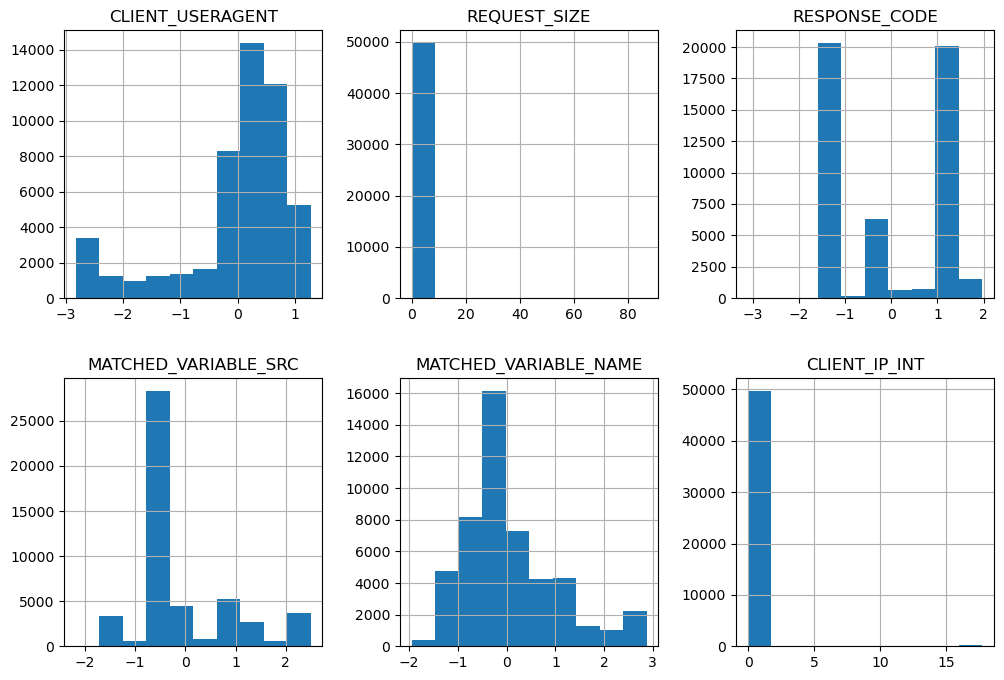

In [257]:
df_clean_train.hist(figsize=(12,8), layout=(-1,3));

In [258]:
from sklearn.cluster import DBSCAN

In [259]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
clustering = dbscan.fit(df_clean_train)

In [260]:
cluster_labels = clustering.labels_
#cluster_labels

In [261]:
df_clean_train['Cluster_Label'] = cluster_labels
df_clean_train.head(2)

CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  MATCHED_VARIABLE_SRC  \
0          1.142912      -0.05240       0.962728              1.557900   
1          0.567701      -0.05021      -0.067731             -0.311496   

   MATCHED_VARIABLE_NAME  CLIENT_IP_INT  Cluster_Label  
0              -1.172190      -0.057196              0  
1               2.697512      -0.057196              1

C:\Users\gWX1084615\Anaconda3\envs\xai\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\gWX1084615\Anaconda3\envs\xai\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


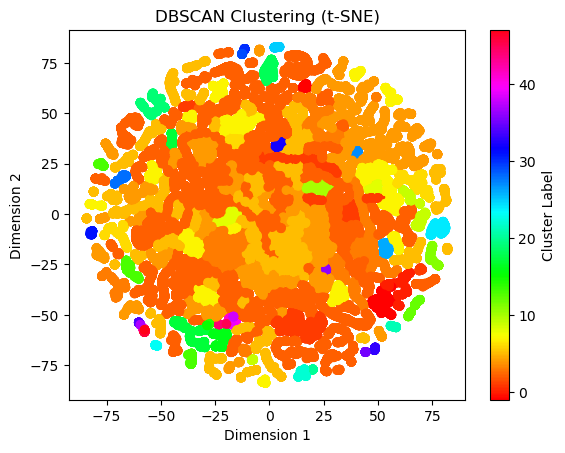

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(df_clean_train)

plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='hsv')
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
tsne_3d = TSNE(n_components=3)
data_reduced = tsne_3d.fit_transform(df_clean_train.drop('normalised_feats',axis=True))

plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='hsv')
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [262]:
cluster_labels.max()

47

In [40]:
def int_to_ip(ip_int):
    try:
        if ip_int<=4294967295: # ipv4
            return str(ipaddress.IPv4Address(ip_int))
        else: # ipv6
            return str(ipaddress.IPv6Address(ip_int))
    except(ipaddress.AddressValueError):
        return None
    

In [46]:
import plotly.express as px

In [263]:
fig = px.scatter_3d(df_clean_train, y='CLIENT_IP_INT', x='RESPONSE_CODE', z='MATCHED_VARIABLE_SRC', color='Cluster_Label')
fig.update_traces(marker=dict(size=3))
fig.show()

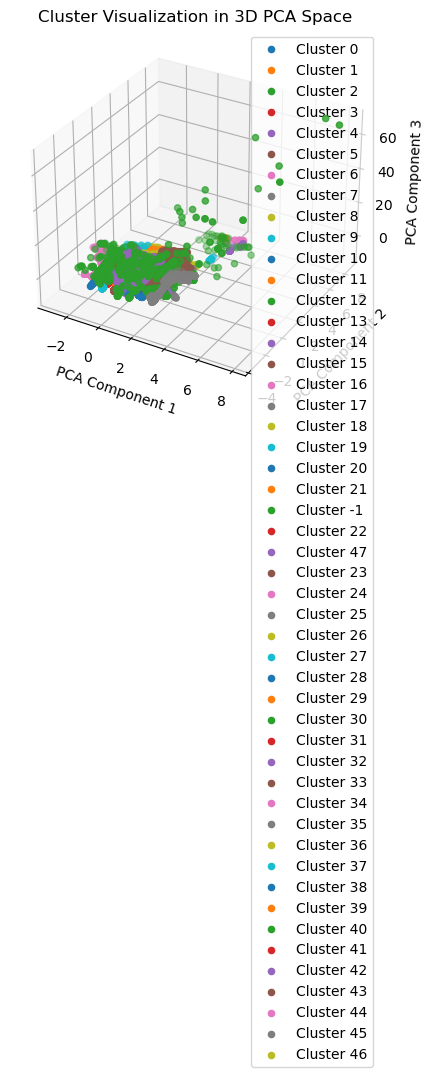

In [174]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)
PCA_3d = pd.DataFrame(pca_3.fit_transform(df_clean_train.drop(['normalised_feats', 'Cluster_Label'], axis=1)))
PCA_3d.head()

# удалить
tmp = df_clean_train.reset_index()
tmp.drop(['index'],axis=1,inplace=True)
label_0=tmp[tmp['Cluster_Label']==0].index.tolist()
tmp.loc[label_0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster_label in df_clean_train.Cluster_Label.unique():
    tmp = df_clean_train.reset_index()
    cluster_data = PCA_3d[(tmp['Cluster_Label']==cluster_label)]
    ax.scatter(cluster_data[0],cluster_data[1],cluster_data[2], label=f'Cluster {cluster_label}')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3') 
ax.set_title('Cluster Visualization in 3D PCA Space')
ax.legend()
plt.show()

In [56]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=4)


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [81]:
# идея поделить на октеты отдельно, чтобы не делать нормировку по всему адресу, а взять как отдельные признаки каждый октет. Что делать тогда с ipv6?
# %%time
# ip_df = df[['CLIENT_IP']][:10]
# ip_df.head()
# def ip_to_octs(x):
#     octets = str(x).split('.')
#     #print(octets)
#     if len(octets)==4:
#         ip_df['oct1'] = octets[0]
#         ip_df['oct2'] = octets[1]
#         ip_df['oct3'] = octets[2]
#         ip_df['oct4'] = octets[3]
# #ip_df['oct1','oct2','oct3','oct4'] = ip_df.CLIENT_IP[:10].parallel_apply(ip_to_octs)
# ip_df['oct1'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[0])
# ip_df['oct2'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[1])
# ip_df['oct3'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[2])
# ip_df['oct4'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[3])
# ip_df.head()

Wall time: 3.99 ms


CLIENT_IP oct1 oct2 oct3 oct4
0   188.138.92.55  188  138   92   55
1  93.158.215.131   93  158  215  131
2  176.123.240.64  176  123  240   64
3     73.78.81.63   73   78   81   63
4     66.102.9.44   66  102    9   44

In [195]:
#df.CLIENT_IP.value_counts().to_csv('CLIENT_IP_df.csv')

In [181]:
from ip2geotools.databases.noncommercial import DbIpCity

In [204]:
df_clean.CLIENT_IP.value_counts()

217.175.140.69     8600
188.43.52.163       767
5.143.231.38        633
192.168.100.63      500
103.208.220.130     269
                   ... 
176.117.150.149       1
212.220.116.5         1
5.254.233.124         1
162.210.196.100       1
89.23.32.19           1
Name: CLIENT_IP, Length: 24859, dtype: int64

In [203]:
# посчитать ipм6
ipv6_count = sum(df_clean.CLIENT_IP.apply(lambda ip: isinstance(ipaddress.ip_address(ip), ipaddress.IPv6Address)))
ipv6_count

ValueError: '2a01:598:9902:df0c:8115:691e:c38' does not appear to be an IPv4 or IPv6 address

In [191]:
response = DbIpCity.get('2001:0db8:85a3:0000:0000:8a2e:0370:7334')

In [193]:
response.region

In [188]:
ip_df['region'] = ip_df['CLIENT_IP'].apply(lambda x: DbIpCity.get(x).region)
ip_df['region'] = ip_df['CLIENT_IP'].apply(lambda x: DbIpCity.get(x).region)


In [189]:
ip_df.head()

CLIENT_IP oct1 oct2 oct3 oct4         region
0   188.138.92.55  188  138   92   55      Grand Est
1  93.158.215.131   93  158  215  131  North Holland
2  176.123.240.64  176  123  240   64        Bishkek
3     73.78.81.63   73   78   81   63       Colorado
4     66.102.9.44   66  102    9   44     California

In [190]:
ip_df.region.nunique()

10

In [82]:
df.MATCHED_VARIABLE_VALUE.str.contains('xmlrpc').value_counts()

False    57682
True         1
Name: MATCHED_VARIABLE_VALUE, dtype: int64

In [83]:
df.loc[df.MATCHED_VARIABLE_VALUE.str.contains('xmlrpc')==True]

CLIENT_IP                                   CLIENT_USERAGENT  \
28911  178.218.223.58  Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  \
28911          365           301          REQUEST_URI                   NaN   

                         MATCHED_VARIABLE_VALUE              EVENT_ID  
28911  /tmp/install_4f7d980098a61/wp-xmlrpc.php  AVdXkd2pq1Ppo9zFz1u5

In [84]:
# можно попробовать доп признак:
df['CLIENT_USERAGENT'].str.contains('bot').value_counts()

False    52860
True      4657
Name: CLIENT_USERAGENT, dtype: int64

In [87]:
df.loc[df['CLIENT_USERAGENT'].str.contains('bot')==True]

CLIENT_IP                                   CLIENT_USERAGENT  \
12        130.193.51.5  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...   
26      164.132.161.37  Mozilla/5.0 (compatible; AhrefsBot/5.2; +http:...   
29     217.182.132.148  Mozilla/5.0 (compatible; AhrefsBot/5.2; +http:...   
30        5.255.253.82  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...   
45        141.8.142.25  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...   
...                ...                                                ...   
57813    93.158.152.18  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...   
57815    93.158.152.22  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...   
57820    163.172.66.74  Mozilla/5.0 (compatible; AhrefsBot/5.1; +http:...   
57829   164.132.161.20  Mozilla/5.0 (compatible; AhrefsBot/5.2; +http:...   
57835    54.36.150.111  Mozilla/5.0 (compatible; AhrefsBot/5.2; +http:...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
12             377           200          REQUEST_URI   
26             186           200         REQUEST_PATH   
29             240           200     RESPONSE_HEADERS   
30             553           200    REQUEST_ARGS_KEYS   
45             326           302     REQUEST_GET_ARGS   
...            ...           ...                  ...   
57813          453           200    REQUEST_ARGS_KEYS   
57815          716           200    REQUEST_ARGS_KEYS   
57820          316           302     REQUEST_GET_ARGS   
57829          277           200     REQUEST_GET_ARGS   
57835          234           302     REQUEST_GET_ARGS   

                                   MATCHED_VARIABLE_NAME  \
12                                                   NaN   
26                                          REQUEST_PATH   
29                         RESPONSE_HEADERS.Content-Type   
30     %252525252526page%25252525253D2%252525252526pa...   
45                                                  link   
...                                                  ...   
57813  %252525252526page%25252525253D1%2525252526page...   
57815      ?%253F%25253F%252525253F%25252525253FPAGEN_18   
57820                                                url   
57829                                REQUEST_GET_ARGS.id   
57835                                REQUEST_GET_ARGS.id   

                                  MATCHED_VARIABLE_VALUE              EVENT_ID  
12     /home/tag/tag/page/zlatoust-dvorec-pobedy/next/23  AVdjdEGLq1Ppo9zF6Pm-  
26                                             /members/  01B4G2QB5cBXmMW1spkq  
29                               text/html;charset=UTF-8  UVdMHGQB5cBXmMW1U4Bz  
30     %252525252526page%25252525253D2%252525252526pa...  AVdZ1oYsq1Ppo9zF1KDl  
45               http://www.mainlink.ru/?partnerid=88530  AVdZNeXhq1Ppo9zF003q  
...                                                  ...                   ...  
57813  %252525252526page%25252525253D1%2525252526page...  AVdfxaNEq1Ppo9zF4kga  
57815      ?%253F%25253F%252525253F%25252525253FPAGEN_18  AVdszTyCq1Ppo9zF_Qgb  
57820  http://www.chicagobearsuk.com/wp/high-school-e...  AVdYMhH0q1Ppo9zF0PwB  
57829                                            1135794  0KPzImQB5cBXmMW11F2w  
57835                                             107024  3rFXJGQB5cBXmMW14vNg  

[4657 rows x 8 columns]

### проверка алгоритмов

In [88]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [89]:
# better higher
silhouette_score(df_clean_train,cluster_labels)

0.41867361750855087

In [90]:
# better lower
davies_bouldin_score(df_clean_train,cluster_labels)

0.5772057827810806

In [91]:
# преобразуем в еклидово пространство признаки и посчитаем силует_скор

In [92]:
df_clean_train['normalised_feats'] =  df_clean_train.apply(lambda x: np.linalg.norm([0]*6-x[['CLIENT_USERAGENT','REQUEST_SIZE',
                                                                                             'RESPONSE_CODE','CLIENT_IP_INT',
                                                                                            'MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME',]]),
                                                                                   axis=1)


In [93]:
df_clean_train['normalised_feats'].head()

0    2.457385
1    2.775454
2    1.738712
3    2.775461
4    2.349454
Name: normalised_feats, dtype: float64

In [94]:
df_clean_train.iloc[1],df_clean_train.iloc[3]

(CLIENT_USERAGENT         0.567445
 REQUEST_SIZE            -0.050198
 RESPONSE_CODE           -0.067358
 MATCHED_VARIABLE_SRC    -0.311462
 MATCHED_VARIABLE_NAME    2.697001
 CLIENT_IP_INT           -0.057196
 Cluster_Label            1.000000
 normalised_feats         2.775454
 Name: 1, dtype: float64,
 CLIENT_USERAGENT         0.567445
 REQUEST_SIZE            -0.050562
 RESPONSE_CODE           -0.067358
 MATCHED_VARIABLE_SRC    -0.311462
 MATCHED_VARIABLE_NAME    2.697001
 CLIENT_IP_INT           -0.057196
 Cluster_Label            1.000000
 normalised_feats         2.775461
 Name: 3, dtype: float64)

In [95]:
silhouette_score(df_clean_train[['normalised_feats']], df_clean_train['Cluster_Label'].to_numpy())
                                                           

-0.5947835157878694